In [ ]:
import os
import sys
sys.path.append('../thermodynamic-interpolation')

from rembg import remove
from PIL import Image
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette(sns.color_palette("Dark2", n_colors=10), n_colors=10)
palette = sns.color_palette()
matplotlib.rcParams.update({'font.size': 20})
cmap = 'crest_r'

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_image(img, fig, x_pos=0, y_pos=0, dim=256, remove_bg=False):
    if remove_bg:
        img = remove(img)

    maxsize = (dim, dim)
    img.thumbnail(maxsize)
    
    fig.figimage(img, x_pos, y_pos)


def plot_gradient(ax, cmap="coolwarm_r"):
    gradient = np.linspace(0, 1, 512).reshape(1, -1)
    ax.matshow(gradient, aspect='auto', cmap=cmap, vmin=-0.1, vmax=1.1)


def add_text_to_plot(ax, text, x_pos, y_pos, fontsize=15, color='black', weight='normal'):
    ax.text(x_pos, y_pos, text, fontsize=fontsize, ha='center', va='center', transform=ax.transAxes, color=color, weight=weight)

def add_arrow(fig, x_start, y_start, x_end, y_end, color='black', linestyle='-'):
    fig.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start), arrowprops=dict(arrowstyle="->", color=color, lw=2, linestyle=linestyle))

def add_box(ax, x_pos, y_pos, width, height, color='black', lw=2):
    ax.add_patch(matplotlib.patches.Rectangle((x_pos, y_pos), width, height, fill=False, edgecolor=color, lw=lw))

def plot_double_well(ax, x_pos, y_pos, x_min, x_max, y_min, y_max, scale, color='black', lw=4):

    # double well function
    fn = lambda x, x_pos, y_pos: scale*(8*((x-x_pos)**2-1)**2 + 0.5*(x-x_pos) + y_pos)
    x = np.linspace(x_min, x_max, 100)

    # confine to max width and height in plot
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])

    ax.plot(x, fn(x, x_pos, y_pos), color=color, linewidth=lw)

def load_free_energy(results_save_path="/home/selma/workspace/Chalmers/Thesis/thermointerpolants/paper/mdqm9/results/"):
    free_energies_md_ti = []
    free_energies_md_ti_ci = []
    free_energies_bg_ref = []
    free_energies_bg_ref_ci = []
    free_energies_bg_ti_tfep = []
    free_energies_bg_ti_tfep_ci = []
    for folder in sorted(os.listdir(results_save_path)):

        if not os.path.isdir(results_save_path + folder):
            continue

        for f in os.listdir(results_save_path + folder):
            if f == "df_md_ti.npy":
                dF_md_ti = np.load(results_save_path + folder + "/" + f)
                free_energies_md_ti.append(dF_md_ti)
            elif f == "dF_md_ti_ci.npy":
                dF_md_ti_ci = np.load(results_save_path + folder + "/" + f)
                free_energies_md_ti_ci.append(dF_md_ti_ci)

            elif f == "dF_bg_ref_tfep.npy":
                dF_bg_ref = np.load(results_save_path + folder + "/" + f)
                free_energies_bg_ref.append(dF_bg_ref)
            elif f == "dF_bg_ref_tfep_ci.npy":
                dF_bg_ref_ci = np.load(results_save_path + folder + "/" + f)
                free_energies_bg_ref_ci.append(dF_bg_ref_ci)

            elif f == "dF_bg_ti_tfep.npy":
                dF_bg_ti_tfep = np.load(results_save_path + folder + "/" + f)
                free_energies_bg_ti_tfep.append(dF_bg_ti_tfep)
            elif f == "dF_bg_ti_tfep_ci.npy":
                dF_bg_ti_tfep_ci = np.load(results_save_path + folder + "/" + f)
                free_energies_bg_ti_tfep_ci.append(dF_bg_ti_tfep_ci)

    free_energies_md_ti = np.array(free_energies_md_ti)
    free_energies_bg_ref = np.array(free_energies_bg_ref)
    free_energies_bg_ti_tfep = np.array(free_energies_bg_ti_tfep)

    free_energies_md_ti_ci = np.stack(free_energies_md_ti_ci)
    free_energies_bg_ref_ci = np.stack(free_energies_bg_ref_ci)
    free_energies_bg_ti_tfep_ci = np.stack(free_energies_bg_ti_tfep_ci)
    return (free_energies_md_ti, free_energies_md_ti_ci, free_energies_bg_ref), (free_energies_bg_ref_ci, free_energies_bg_ti_tfep, free_energies_bg_ti_tfep_ci)


def load_ess(results_save_path="/home/selma/workspace/Chalmers/Thesis/thermointerpolants/paper/mdqm9/results/"):
    ess_md_tis = []
    ess_md_ti_cis = []
    ess_bg_tis = []
    ess_bg_ti_cis = []
    ess_bg_T0s = []
    ess_bg_T0_cis = []

    for folder in sorted(os.listdir(results_save_path)):

        if not os.path.isdir(results_save_path + folder):
            continue

        for f in os.listdir(results_save_path + folder):
            if f == "ess_md_ti_percentage.npy":
                ess_md_ti = np.load(results_save_path + folder + "/" + f)
                ess_md_tis.append(ess_md_ti)
            elif f == "ess_md_ti_ci_percentage.npy":
                ess_md_ti_ci = np.load(results_save_path + folder + "/" + f)
                ess_md_ti_cis.append(ess_md_ti_ci)

            elif f == "ess_bg_ti_percentage.npy":
                ess_bg_ti = np.load(results_save_path + folder + "/" + f)
                ess_bg_tis.append(ess_bg_ti)
            elif f == "ess_bg_ti_ci_percentage.npy":
                ess_bg_ti_ci = np.load(results_save_path + folder + "/" + f)
                ess_bg_ti_cis.append(ess_bg_ti_ci)

            elif f == "ess_bg_T0_percentage.npy":
                ess_bg_T0 = np.load(results_save_path + folder + "/" + f)
                ess_bg_T0s.append(ess_bg_T0)
            elif f == "ess_bg_T0_ci_percentage.npy":
                ess_bg_T0_ci = np.load(results_save_path + folder + "/" + f)
                ess_bg_T0_cis.append(ess_bg_T0_ci)

    ess_md_tis = np.array(ess_md_tis)
    ess_bg_tis = np.array(ess_bg_tis)
    ess_bg_T0s = np.array(ess_bg_T0s)

    ess_md_ti_cis = np.stack(ess_md_ti_cis)
    ess_bg_ti_cis = np.stack(ess_bg_ti_cis)
    ess_bg_T0_cis = np.stack(ess_bg_T0_cis)
    
    return (ess_md_tis, ess_md_ti_cis, ess_bg_tis), (ess_bg_ti_cis, ess_bg_T0s, ess_bg_T0_cis)

Width: 3600.0, Height: 2400.0


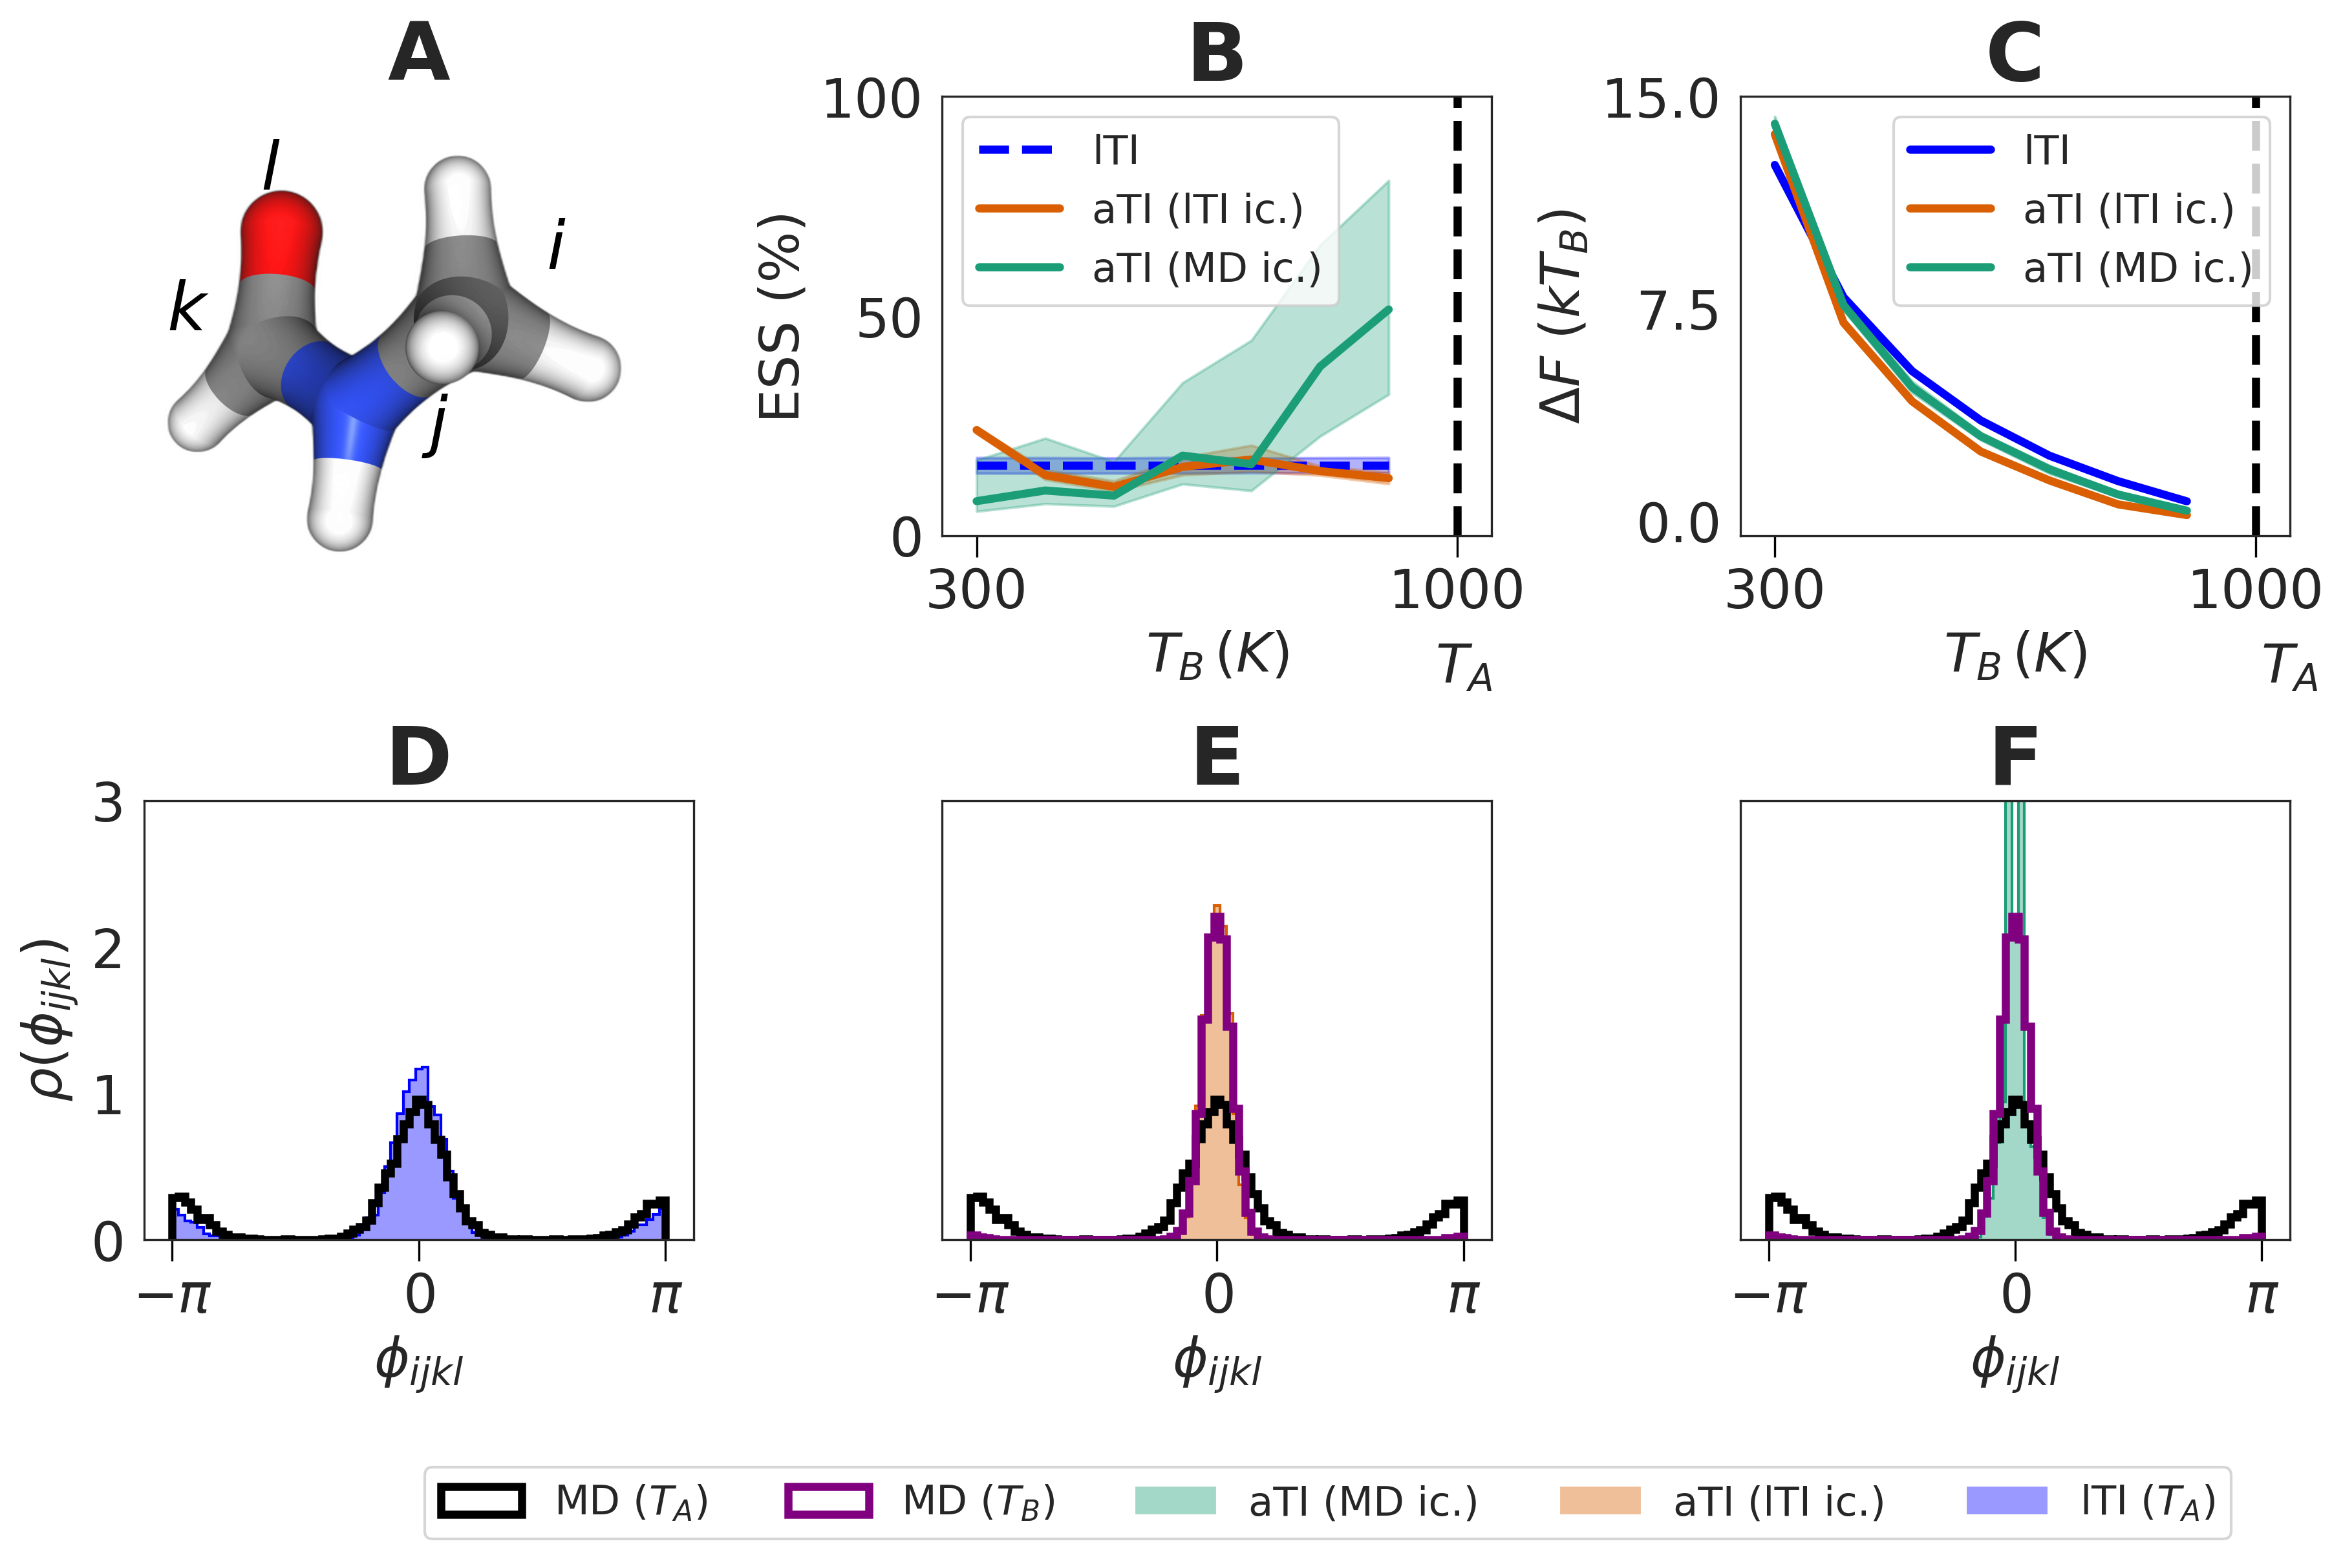

In [ ]:
# Small TI visualization
interm_frames_path = "mdqm9/plots/frames"  # use "img/00031_no_300/intermediate_frames/ballstick" for ball+stick style molecules
frame = Image.open(f"{interm_frames_path}/frame4.png")

fig, axs = plt.subplots(3, 3, figsize=(12, 8), dpi=300, height_ratios=[1, 1, 0.1])
axs = axs.flatten()
axs[0].axis('off')

# ESS plot
T0 = 1000
T1s = [300, 400, 500, 600, 700, 800, 900]

(ess_md_tis, ess_md_ti_cis, ess_bg_tis), (ess_bg_ti_cis, ess_bg_T0s, ess_bg_T0_cis) = load_ess()

axs[1].plot(T1s, ess_bg_T0s, color='b', label="lTI", linewidth=3, linestyle='--')
axs[1].fill_between(T1s, ess_bg_T0_cis[:, 0], ess_bg_T0_cis[:, 1], color='b', alpha=0.3)
axs[1].plot(T1s, ess_bg_tis, color=palette[1], label="aTI (lTI ic.)", linewidth=3, linestyle='-')
axs[1].fill_between(T1s, ess_bg_ti_cis[:, 0], ess_bg_ti_cis[:, 1], color=palette[1], alpha=0.3)
axs[1].plot(T1s, ess_md_tis, color=palette[0], label="aTI (MD ic.)", linewidth=3, linestyle='-')
axs[1].fill_between(T1s, ess_md_ti_cis[:, 0], ess_md_ti_cis[:, 1], color=palette[0], alpha=0.3)
axs[1].set_xlabel("$T_B\,(K)$")
axs[1].set_ylabel("ESS (%)")
axs[1].axvline(T0, color='k', linestyle='--', linewidth=3)

# add text next to xlabel
axs[1].text(0.95, -0.30, "$T_A$", ha='center', va='center', transform=axs[1].transAxes)
axs[1].set_xlim(290, 1010)
axs[1].set_xticks([300, 1000])
axs[1].set_xlim([250, 1050])
axs[1].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')
axs[1].set_yticks([0, 50, 100])

axs[1].set_title(r"B", fontsize=30, weight='bold')
axs[1].legend(loc='upper left', fontsize=15)

# free energy plot
T0 = 1000
T1s = [300, 400, 500, 600, 700, 800, 900]

(free_energies_md_ti, free_energies_md_ti_ci, free_energies_bg_ref), (free_energies_bg_ref_ci, free_energies_bg_ti_tfep, free_energies_bg_ti_tfep_ci) = load_free_energy()

axs[2].plot(T1s, free_energies_bg_ref, color='b', label=r"lTI", linewidth=3, linestyle='-')
axs[2].fill_between(T1s, free_energies_bg_ref_ci[:, 0], free_energies_bg_ref_ci[:, 1], color='b', alpha=0.4)

axs[2].plot(T1s, free_energies_bg_ti_tfep, color=palette[1], label=r"aTI (lTI ic.)", linewidth=3, linestyle='-')
axs[2].fill_between(T1s, free_energies_bg_ti_tfep_ci[:, 0], free_energies_bg_ti_tfep_ci[:, 1], color=palette[1], alpha=0.4)

axs[2].plot(T1s, free_energies_md_ti, color=palette[0], label=r"aTI (MD ic.)", linewidth=3, linestyle='-')
axs[2].fill_between(T1s, free_energies_md_ti_ci[:, 0], free_energies_md_ti_ci[:, 1], color=palette[0], alpha=0.4)

axs[2].set_xlabel("$T_B\,(K)$")
axs[2].set_ylabel(r"$\Delta F$ ($kT_B$)")
axs[2].set_xlim(290, 1010)
axs[2].set_xticks([300, 1000])
axs[2].set_xlim([250, 1050])
axs[2].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')
axs[2].set_yticks([0, 7.5, 15])

axs[2].axvline(T0, color='k', linestyle='--', linewidth=3)
axs[2].text(1, -0.30, "$T_A$", ha='center', va='center', transform=axs[2].transAxes)
axs[2].set_title(r"C", fontsize=30, weight='bold')
axs[2].legend(loc='upper right', fontsize=15)


# torsion plot
T0 = 1000
T1 = 300
bins = np.linspace(-np.pi, np.pi, 80)
max_width = fig.bbox.xmax
max_height = fig.bbox.ymax
print(f"Width: {max_width}, Height: {max_height}")

torsion_path = "/home/selma/workspace/Chalmers/Thesis/thermointerpolants/paper/mdqm9/results/00031_no_300_v2_1000to300K"
torsions_bg_ref_T0 = np.load(os.path.join(torsion_path, "torsions_bg_ref_T0.npy"))
torsions_bg_ref_T1 = np.load(os.path.join(torsion_path, "torsions_bg_ref_T1.npy"))
torsions_bg_ti_T0 = np.load(os.path.join(torsion_path, "torsions_bg_ti_0.npy"))
torsions_bg_ti_T1 = np.load(os.path.join(torsion_path, "torsions_bg_ti_1.npy"))
torsions_md_0 = np.load(os.path.join(torsion_path, "torsions_md_T0.npy"))
torsions_md_1 = np.load(os.path.join(torsion_path, "torsions_md_T1.npy"))
torsions_md_ti_T1 = np.load(os.path.join(torsion_path, "torsions_md_ti_1.npy"))

weights_bg_ref_T0 = np.load(os.path.join(torsion_path, "weights_bg_ref_T0.npy"))
weights_bg_ref_T1 = np.load(os.path.join(torsion_path, "weights_bg_ref_T1.npy"))
weights_bg_ti_T0 = np.load(os.path.join(torsion_path, "weights_bg_ti_T0.npy"))
weights_bg_ti_T1 = np.load(os.path.join(torsion_path, "weights_bg_ti_T1.npy"))
weights_md_ti = np.load(os.path.join(torsion_path, "weights_md_ti.npy"))

# BG torsions
axs[3].hist(torsions_bg_ref_T0[:, 4], bins=bins, histtype="stepfilled", alpha=0.4, color='b', density=True, label=r"lTI ($T_A$)", linewidth=0.1, weights=weights_bg_ref_T0)
axs[3].hist(torsions_bg_ref_T0[:, 4], bins=bins, histtype="step", color='b', density=True, linewidth=1, weights=weights_bg_ref_T0)
axs[3].hist(torsions_md_0[:, 4], bins=bins, histtype="step", color='k', density=True, label=r"MD $(T_A)$", linewidth=3)

#axs[3].set_xticks(np.arange(-3.5, 3.6, step=3.5))
axs[3].set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
axs[3].set_xticks([-np.pi, 0, np.pi])
axs[3].set_xlim([-3.5, 3.5])
axs[3].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

axs[3].set_ylim([0, 3])
axs[3].set_xlabel(r"$\phi_{ijkl}$")
axs[3].set_ylabel(r"$\rho(\phi_{ijkl})$")
axs[3].set_title("D", fontsize=30, weight='bold')

# BG/TI torsions
axs[4].hist(torsions_bg_ti_T1[:, 4], bins=bins, histtype="stepfilled", alpha=0.4, color=palette[1], density=True, label="aTI (lTI ic.)", linewidth=0.1, weights=weights_bg_ti_T1)
axs[4].hist(torsions_bg_ti_T1[:, 4], bins=bins, histtype="step", color=palette[1], density=True, linewidth=1, weights=weights_bg_ti_T1)
axs[4].hist(torsions_md_0[:, 4], bins=bins, histtype="step", color='k', density=True, label=r"MD $(T_A)$", linewidth=3, linestyle='-')
axs[4].hist(torsions_md_1[:, 4], bins=bins, histtype="step", color='purple', density=True, label=r"MD ($T_B$)", linewidth=3)

axs[4].set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
axs[4].set_xticks([-np.pi, 0, np.pi])
axs[4].set_xlim([-3.5, 3.5])
axs[4].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

# axs[4].set_ylabel(r"$\rho(\phi_{ijkl})$")
axs[4].set_yticks([])
axs[4].set_ylim([0, 3])
axs[4].set_xlabel(r"$\phi_{ijkl}$")
axs[4].set_title("E", fontsize=30, weight='bold')

# MD/TI torsions
axs[5].hist(torsions_md_ti_T1[:, 4], bins=bins, histtype="stepfilled", alpha=0.4, color=palette[0], density=True, label="aTI (MD ic.)", linewidth=0.1, weights=weights_md_ti)
axs[5].hist(torsions_md_ti_T1[:, 4], bins=bins, histtype="step", color=palette[0], density=True, linewidth=1, weights=weights_md_ti)
axs[5].hist(torsions_md_0[:, 4], bins=bins, histtype="step", color='k', density=True, label=r"MD $(T_A)$", linewidth=3, linestyle='-')
axs[5].hist(torsions_md_1[:, 4], bins=bins, histtype="step", color='purple', density=True, label=r"MD ($T_B$)", linewidth=3)

axs[5].set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
axs[5].set_xticks([-np.pi, 0, np.pi])
axs[5].set_xlim([-3.5, 3.5])
axs[5].tick_params(bottom=True, top=False, axis='x', color='k', length=8, grid_color='none')

# axs[5].set_ylabel(r"$\rho(\phi_{ijkl})$")
axs[5].set_yticks([])
axs[5].set_ylim([0, 3])
axs[5].set_xlabel(r"$\phi_{ijkl}$")
axs[5].set_title("F", fontsize=30, weight='bold')

axs[6].axis('off')
axs[7].axis('off')
axs[8].axis('off')

dim = 900
plot_image(img=frame, fig=fig, x_pos=150, y_pos=1540, dim=dim, remove_bg=True)  # little molecule
# x4: 7, x3: 5, x2: 1, x1: 0
add_text_to_plot(axs[0], r"$i$", x_pos=0.75, y_pos=0.65, fontsize=25)
add_text_to_plot(axs[0], r"$j$", x_pos=0.53, y_pos=0.25, fontsize=25)
add_text_to_plot(axs[0], r"$k$", x_pos=0.08, y_pos=0.51, fontsize=25)
add_text_to_plot(axs[0], r"$l$", x_pos=0.23, y_pos=0.83, fontsize=25)
axs[0].set_title(r"A", fontsize=30, weight='bold')


lines_labels = [axs[3].get_legend_handles_labels(), axs[4].get_legend_handles_labels(), axs[5].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# get unique labels and match them with the lines
lines_labels = {label: line for line, label in zip(lines, labels)}
labels = sorted(list(lines_labels.keys()))
lines = [lines_labels[label] for label in labels]

fig.legend(lines, labels, loc="lower left", ncol=len(labels), bbox_to_anchor=(0.17, 0), fontsize=15)

plt.tight_layout(pad=0.2)
plt.savefig("results_main_plot.pdf", bbox_inches='tight')
